### 1차원 데이터
 - 평균값(기댓값), 표본본산, 불편분산(ddof=1), 표준편차
 - 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을
 없애기 위한 것이 불편분산 -> 표본분산 보다 조금 큰 값이 된다.
 - 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
 - 최댓값, 최솟값, 중앙값, 사분위수 -> box plot
 - 표준분산과 비편향 분산
     - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
     - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
     - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
     - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
     - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

### [표본분산이 분산을 과소 평가하는 이유]
   - 호수 안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3}, 샘플링1의 표본평균 2 샘플링2 3마리{5,6,7} 표본평균 6
   - 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
   - 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.
   - 즉 N으로 나누면 표본분산, N-1로 나누면 불편분산 -> 표본분산이 일반적으로 과소평가되므로 N-1로 해주면 편향이 개선이 됨 그것이 불편분산

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [3]:
scores = np.array(df.english)[:10] # index 0부터 9까지
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
score_df = pd.DataFrame({'score': scores},
                        #  index = ['A','B','C','D','E','F','G','H','I','J'])
                       index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
# 평균값
print(sum(scores)/len(scores)) # 총 데이터 / 데이터의 개수
print(np.mean(scores))
score_df.mean() # .mean()으로도 표현가능

55.0
55.0


score    55.0
dtype: float64

In [6]:
sorted_scores = np.sort(scores) # 정렬
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [13]:
# 중앙값 구하기
n = len(sorted_scores) # len은 0부터 시작
print(n)
# print(7//3) 몫 구하기
if n % 2 == 0: # 길이가 짝수면  
    m0 = sorted_scores[n//2 - 1] #  n이 전체 길이가 10이므로  절반에 -1 한 값을 mo에 담고
    m1 = sorted_scores[n//2] #  절반값을 m1에 담아라
    median = (m0 + m1) / 2  # 절반에 -1한값이랑 절반값을 더하고 / 그 개수인 2로 나누면 -> 중앙값이니까
else: # 홀수면
    median = sorted_scores[(n+1)//2 - 1]  # 길이에 1을 더한값에 몫을 구하고 -1 하면 구해짐
median

10


56.5

In [12]:
# 중앙값 -> median
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

In [13]:
# 최빈값 -> mode()
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [14]:
# 분산과 표준편차 구하기
scores # 원래의 데이터

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [15]:
# 편차
mean = np.mean(scores) 
print(mean) # 평균
deviation = scores - mean  # 원래의 데이터 - 데이터의 평균값 = 편차
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [16]:
np.mean(deviation) # 편차의 평균값은 모두 0이됨

0.0

In [ ]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

In [14]:
arr = np.random.randint(0,1000,size = 20) # 0 부터 999까지의 정수형 난수를 20개 뽑아
m = np.mean(arr) # 배열의 평균
display(m) 

dev = arr-m # 원래의 배열 요소에서 - 평균값을 빼줌 = 편차
display(dev) 
display(np.sum(dev)) # 편차의 합은 = 0

521.1

array([-111.1,  421.9,  371.9,    3.9,  153.9, -324.1,  356.9, -204.1,
       -126.1,  -69.1,  296.9, -405.1,  127.9,  -83.1,  -65.1, -250.1,
       -324.1, -228.1,  329.9,  126.9])

-4.547473508864641e-13

분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨.

In [49]:
 # 편차 제곱의 평균값 -> 분산  -> 분산의 루트 씌어주면 -> 표준편차
np.mean(deviation**2) # 왜 제곱해줘 why? -> 제곱안해주고 더하면 모두 0으로 되니까 양의 실수로 만들어줘야함 

86.0

In [50]:
np.var(scores) # np.var() 함수는 바로 분산 구해줌

86.0

In [51]:
score_df.var() 

score    95.555556
dtype: float64

In [52]:
df = score_df.copy()
df['devitation'] = deviation # 새로운 열 추가 하고 편차값 넣기
df['square of deviation'] = np.square(deviation) # np.square(deviation) -> 편차의 제곱(자승)
df # 마이너스 * 마이너스 = 양수

,score,devitation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [53]:
df.mean() # 데이터프레임의 평균값들 확인

score                  55.0
devitation              0.0
square of deviation    86.0
dtype: float64

In [16]:
# 표준편차 -> Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정
np.sqrt(np.var(scores,ddof=0)) # 분산에 제곱근을 씌우면 표준편차
# test = [1,9,25,36]
# print(np.sqrt(test)) -> [1. 3. 5. 6.]
# np.sqrt -> 각 요소의 제곱근 배열을 반환

9.273618495495704

In [55]:
np.std(scores) # 동일값 출력 

9.273618495495704

In [56]:
# 판다스로 표본분산을 계산하기 위해서 ddof=0, 불편분산은 ddof=1
df.std(ddof=0)  # std() -> 표준편차

score                   9.273618
devitation              9.273618
square of deviation    74.315543
dtype: float64

In [57]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores) # 최대값 - 최소값 = 4분위수 범위

28

In [58]:
scores_Q1 = np.percentile(scores,25) # 1분위수는 25% -> 100명 중 75등 수치
scores_Q3 = np.percentile(scores,75) # 3분위수는 75% -> 100명 중 25등 수치
scores_IQR = scores_Q3 - scores_Q1 # IQR은 3분위수 - 1분위수
scores_IQR

15.0

In [18]:
# 요약 통계표 -> mean 평균값, std 표준편차, 4분위수 범위, 최소, 최대값 쉽게 확인 가능
pd.Series(scores).describe() # 쉽게 개요 파악

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [25]:
# 데이터의 정규화
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [26]:
# 표준화 -> 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 해줌
z = (scores - np.mean(scores)) / np.std(scores) # (원본 데이터 - 데이터의 평균) 편차  / 데이터의 표준편차
z  # 편차 나누기 표준편차 한 값이 출력

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [27]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [28]:
# 편찻값은 평균이 50, 표준편차가 10이 되도록 정규화한 값을 의미 
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores) # 수식 50 + 10 * 편차 / 표준편차
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [29]:
# DataFrame으로 정리하여 점수와 편찻값의 관계 확인
score_df['deviation_value'] = z
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [67]:
# 50명의 영어 점수를 사용하여, 데이터의 특징이나 분표를 표나 그림을 통해 시각적으로 파악하는 방법
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv')
# 50명의 영어 점수 배열
eng_scores = np.array(df.english)
# Series로 변환하여 통계요약표 확인
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [68]:
# describe() -> 출력된 평균 분산  사분위수 등의 지표로 데이터의 중심이나 산포도 상태를 알 수 있지만
# 세부적인 파악은 어려움 -> 그럴때 분할된 구간과 데이터의 개수를 표로 정리한 도수분포표 활용
freq, _ = np.histogram(eng_scores, bins=10, range=(0,100)) # bins 계급수, range(최소, 최대값)
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [71]:
# 0~10, 10~20, ... 이라는 문자열 리스트 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)] # 0부터 99, +10 -> i에 0 할당, 10할당... 100할당
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq}, # frequency -> 빈도수
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df
# 50~70에 데이터가 몰려 있음 -> 고득점과 저득점이 없고 점수 차가 많이 나지 않음을 파악할 수 있음

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [39]:
for y in range(0,100,10):
    print(y)

0
10
20
30
40
50
60
70
80
90


In [72]:
# 계급값 : 각 계급을 대표하는 값(0~10, 10~20, ... 90~100)으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)] # i가 0 일때 10/2 -> 5
                                                        # i가 10일때 30/2 -> 15
                                                          # i가 20일때 50/2 -> 25 .... i가 90일때 190/2 -> 95    
class_value # 계급의 중앙값 출력                                        


[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [73]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율 -> 계급의 도수 / 도수의 총합
rel_freq = freq / freq.sum() # 상대도수를 모두 더하면 1이 됨
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [74]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq) # np.cumsum 누적합
cum_rel_freq # 맨 마지막은 1

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [75]:
freq_dist_df['class value'] = class_value # 계급값
freq_dist_df['relative frequency'] = rel_freq # 상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq # 누적상대도수
freq_dist_df 
# 상대도수나 누적상대도수를 보면 전체 학생의 68%가 50~70점의 점수를 얻었고, 전체 학생 중 약 절반이 60점 이하 점수를 얻음

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [80]:
# 최빈값 -> 가장 많이 나오는 값
print(freq.max())
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value'] # 데이터 프레임 내 값 가운데 최고값의 인덱스 위치 반환

18


65

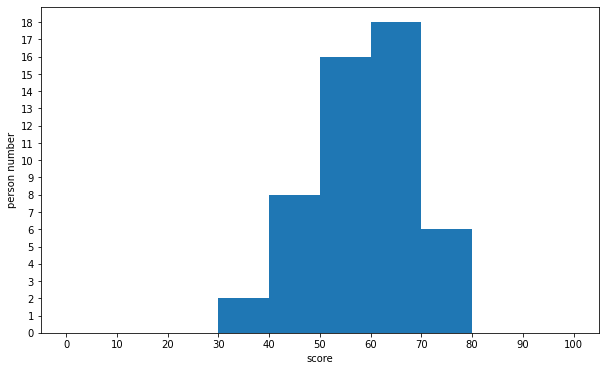

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

freq, _, _ = ax.hist(eng_scores, bins=10, range=(0,100)) # 계급수 10으로 하여 히스토그램 작성

ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,10+1)) # x축을 0, 10, 20, 30...100
ax.set_yticks(np.arange(0,freq.max()+1)) # y축 0, 1, 2 ...18
# freq.max() -> 18 인데 np.arange(0,18) 이면 0,17까지므로 +1을 인위적으로 더해줌

plt.show()

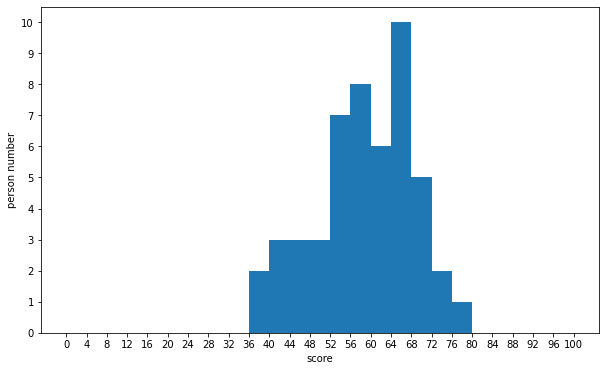

In [97]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(eng_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))  # 끝값은 포함 안하므로 인위적으로 더해줌
ax.set_yticks(np.arange(0,freq.max()+1))   # tick은 그래프의 축에 간격을 구분하기 위해 표시하는 눈금

# bins -> 계급폭을 변경하니 히스토그램의 모양이 크게 변함 -> 데이터에 따라 적절한 값으로 설정하는 것이 중요

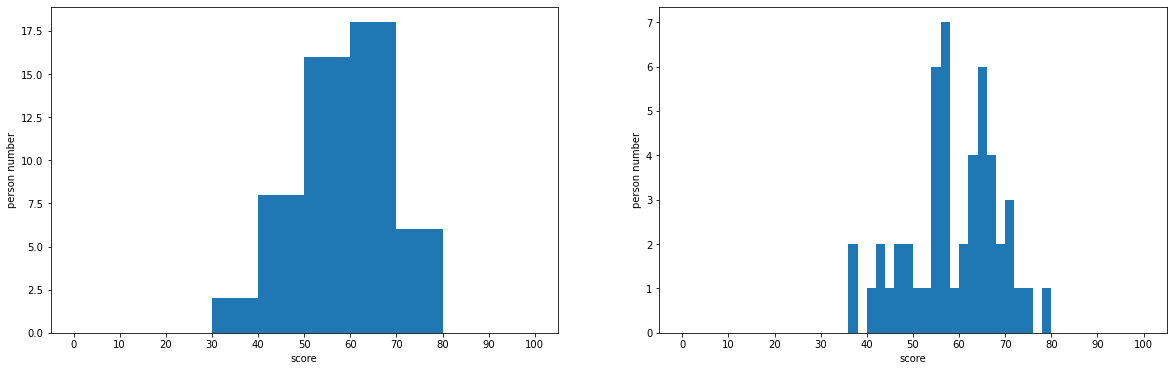

7.0


In [102]:
# 계급수를 10으로 지정하여 도수분포표와 히스토그램 그리기 

import matplotlib.pyplot as plt
# 캔버스 생성
# figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize=(20,6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1 x 2개 지정 하나의 영역에 두개 그린다는 것을 의미
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# ax1에는 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax1.hist(eng_scores, bins=10, range=(0,100)) # bins가 계급수 
freq, _, _ = ax2.hist(eng_scores, bins=50, range=(0,100)) # ax2는 50개로

ax1.set_xlabel('score') # x축 레이블
ax1.set_ylabel('person number') # y축 레이블
ax1.set_xticks(np.linspace(0,100,10+1)) # x축을 0, 10, 20.. 100 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))

ax2.set_xlabel('score')
ax2.set_ylabel('person number')
ax2.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()
plt.close()
print(freq.max())

# 계급을 나눈것을 다르게햇을때 얻을 수 있는 정보가 달라질수 있기 때문에 근거를 가지고 나누어줘야 좀 더 정확하게 많이 정보를 얻을 수 있음

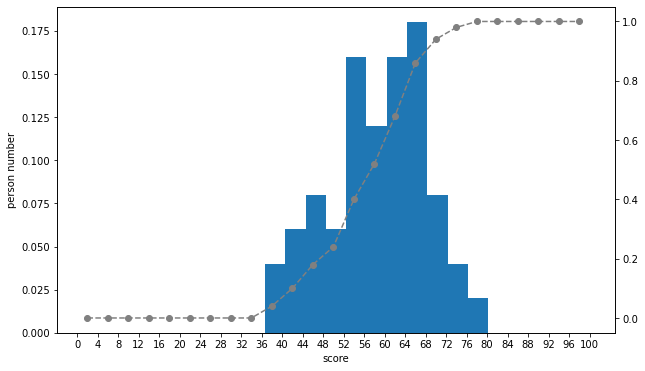

In [104]:
# 상대도수의 히스토그램을 누적상대도수의 꺽은선 그래프로 표현
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

# y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 그리기 위해서는 도수를 데이터의 수로 나눠야함
# 이것은 hist의 인수 weight를 지정하면 실현 가능함
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins=25, range=(1,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]

# 꺽은선 그래프 
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray') # ls '--' : 점선
ax2.grid(visible=False) # 꺽은선 그래프의 눈금선 제거

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

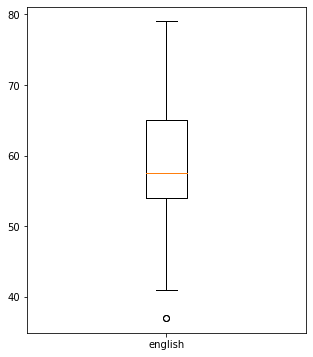

In [20]:
# 상자 그림 -> 데이터의 산포도를 보여줌
fig = plt.figure(figsize=(5,6))
ax =  fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [23]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data) # 평균 -> data이 합 / data의 개수
print(mu)
s = np.sum((data-mu)**2)/len(data) # 분산 -> 편차 제곱의 합을 / data 개수로 나누어줌
s
# 표본 평균은 모평균을 샘플수를 늘려가면 모평균에 근사
# 그렇지만 분산은 그렇지 못하고 과소평가되는 경향이 있음 그래서 보정, n-1 불편분산으로 해줌

4.0


1.2

In [25]:
# 불편분산 -> 표본분산 대비 불편분산이 좀 더 큼 why? n-1로 나누었기 때문 -> 분모가 더 작을수록 값이 커짐
s1 = np.sum((data-mu)**2)/(len(data)-1) # 편차 자승의 합 / n-1
s1 # 과소평가 된 표준분산을 보정을 하여 좀 더 크게 만들었음 -> 위의 1.2(표본분산) 보다 (불편분산)이 큼 

1.3333333333333333

In [31]:
# [과제] 1변량 데이터인 data에 대하여 평균, 표본분산, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단, 함수사용하는 경우와 사용하지 않는 경우를 모두 수행

In [35]:
import numpy as np
arr= np.random.randint(1,10,size=(7)) # 1부터 9 까지 size 7
arr

# 평균
print(arr.mean(),'\n')

# 표본분산
print(np.sum((arr-arr.mean())**2)/len(arr)) # (데이터값 - 데이터값의 평균) -> 편차
print(np.var(arr))                            # 편차 제곱 / 데이터의 개수 

# 불편분산
print(np.sum((arr-arr.mean()**2)/len(arr)-1)) # 편차 제곱 / 데이터 개수 -1 
print(np.var(arr,ddof=1))

# 최대
print(arr.max())

# 최소
print(arr.min())

# 4분위수
arr_Q1 = np.percentile(arr,25) # 제1사분위수 데이터의 25%가 이 값보다 작거나 같음 -> 100명중 75등
arr_Q3 = np.percentile(arr,75) # 제3사분위수 데이터의 75%가 이 값보다 작거나 같음 -> 100명중 25등
print(arr_Q1)
print(arr_Q3)
IQR = arr_Q3-arr_Q1
IQR

# 중앙값
if len(arr)%2 ==0:
    med_0 = arr[len(arr)//2-1]
    med_1 = arr[len(arr)//2]
    med = (med_0+med_1)/2
else:
    med = arr[(len(arr)+1)//2]
print(med)

4.285714285714286 

3.346938775510204
3.346938775510204
-21.081632653061224
3.9047619047619047
8
2
3.0
5.0
5


## 2차원 데이터
- 2차원 데이터에 이용되는 공분산, 상관계수
- 2차원 데이터를 시각화하는 산점도, 회귀직선

In [61]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10] # 10명의 data를 en_scores에 담기
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores, 'mathematics':ms_scores}, # data 프레임 생성
                  index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head(10)

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [110]:
# 공분산 -> 2개의 변수가 어떻게 움직이는지 
# 하나의 변수가 움직였을때 같은 방향으로 움직이면 + 
# 다른방향이면 - 
# 공분산은 데이터의 크기에 따라서 달라지기때문에 직관적으로 알기가 어려움
# 그래서 상관 계수를 구함
# 변수의 표준편차의 곱으로 나눔 -> -1 ~ 1 사이의 계수로 변환이됨
# 최대 양의 상관관계는 1
# 역의 상관관계 -1
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean() # 영어 편차
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean() # 수학 편차
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation'] # 영어 수학 편차 곱
dfc

55.0


,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [30]:
dfc['product of deviation'].mean()
# 영어 점수와 수학 점수는 양의 상관관계에 있음

62.8

In [112]:
# ddof 확인
# None이 기본값이며, None이 아닐경우 bias의 값은 무시된다. 
# ddof가 1일 경우, 바이어스가 되지 않은 결과를 반환한다. 
# fweights와 aweights의 값을 명시해놓더라도 바이어스되지 않은 결과가 반환된다.
# ddof가 0일 경우 단순한 평균을 반환한다. 
cov_mat = np.cov(en_scores, ms_scores, ddof=0)
cov_mat # 공분산 convariance
# 공분산은 각 데이터의 단위를 곱한 것

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [113]:
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

In [33]:
# 영어와 수학의 분산 계산
np.var(en_scores, ddof=0), np.var(ms_scores, ddof=0)

(86.0, 68.44000000000001)

In [35]:
# 공분산을 계산하여 데이터의 상관관계를 표현 but, 점수x점수라는 단위 사용했지만 만약 학생키와 시험 점수의 상관관계를 
# 살펴 본다면 공분산은 cm * 점수 라는 단위가 됨 -> 이런 경우 직감적으로 이해하기 어렵 -> 딘위에 의존하지 않는 상관을 나타내는 지표가 필요함
# 공분산은 각 데이터의 단위를 곱한 것이므로 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의할 수 있음
# 상관계수 -> 반드시 -1과 1 사이의 값을 취함
np.cov(en_scores, ms_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores)) # 0.8이면 강한 상관계수
# 영어 수학 점수의 공분산을 나눈다 / (영어 표준편차 * 수학 표준편차)
# 양의 상관관계에 놓여 있을수록 1에 근접
# 음의 상관관계에 놓여 있을수록 -1에 근접
# 무상관이면 0

0.8185692341186713

In [36]:
np.corrcoef(en_scores,ms_scores) # 반환값은 공분산과 마찬가지로 상관행렬 형식
# 상관행렬 [0,1] 성분과 [1.0] 성분이 영어와 수학의 상관계수에 대응
# 나머지 [0,0] 성분은 영어와 영어의 상관계수, [1,1] 성분은 수학과수학의 상관계수에 대응하므로 -> 1

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [37]:
dfc[['english','mathematics']].corr() # dataframe의 경우

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [38]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)

In [115]:
arr = np.random.randint(0,100,20).reshape(10,2) # 0부터 99까지 20씩 10행 2열 짜리 배열 생성
np.random.seed(0)
print(arr,'\n')

arr1=arr[:,0] # 1열 출력
arr2=arr[:,1] # 2열 출력

arr1_dev = arr1 - np.mean(arr1) # 편차
arr2_dev = arr2 - np.mean(arr2) # 편차

GBS = np.mean(arr1_dev*arr2_dev) # 편차 곱의 평균
SGGS = np.cov(arr1,arr2,ddof=0)[0,1]/(np.std(arr1)*np.std(arr2)) # arr1,arr2공분산 / arr1표준편차 * arr2표준편차

print(f'공분산 : {GBS}')
print(f'상관계수 : {SGGS}')

[[44 47]
 [64 67]
 [67  9]
 [83 21]
 [36 87]
 [70 88]
 [88 12]
 [58 65]
 [39 87]
 [46 88]] 

공분산 : -371.35
상관계수 : -0.6975909422558704


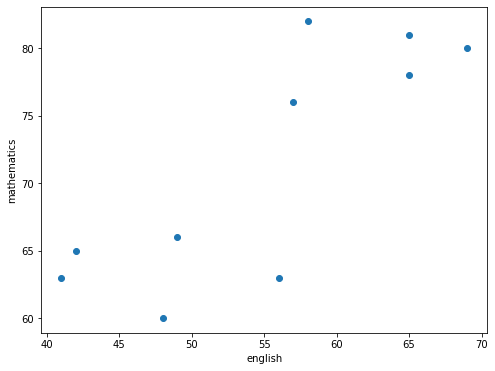

In [44]:
# 산점도 -> 두개의 변수가 어떻게 분포하고 있는지를 확인할 수 있음
# 우상향 -> english가 늘어나면 mathematics도 향상 -> 양의 상관관계
# 상관계수 그 자체만 놓고 보면 정확하게 파악이 안됨
# 동일한 상관계수를 보이는것도 그림으로 그려보면 다를 수 있기 떄문에 
# 그림을 반드시 보고 판단 -> 시각화 해야 직관적으로 볼 수 있다 
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show() # 영어 점수가 높은사람일수록 수학 점수도 높은 경향
plt.close()

### 다항곡선 회귀분석

 - 기본문법: p = polyfit(x,y,n)
     - x: data의 input값이다.
     - y: input값에 해당하는 data의 output값이다.
     - n: 근사할 다항식의 차수(order)이다.
     - 참조 https://qlsenddl-lab.tistory.com/48


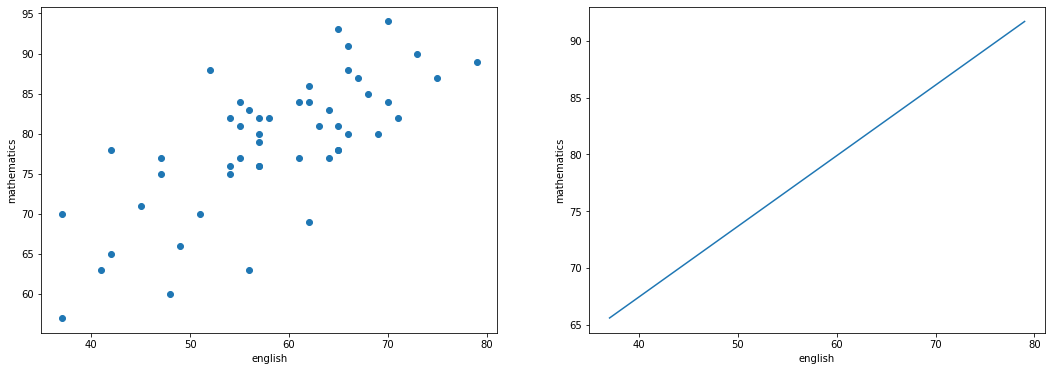

In [117]:
# 회귀직선
eng_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

# 계수 구하기  eng, math
poly_fit = np.polyfit(eng_scores, math_scores,1)
# eng + math x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위한 x좌표 생성
xs = np.linspace(eng_scores.min(), eng_scores.max())
# xs에 대응하는 y좌표 구함
ys = poly_1d(xs)

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores, math_scores)
ax2.plot(xs,ys)

ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
plt.show()

# 산점도를 기반으로 해서 각각의 데이터와 편차가 편차의 합이 최소화 되는 그런 회귀선을 그리면은
# 그 회귀선을 이용해서 데이터간의 관계를 좀 더 명확하게 알 수가 있다

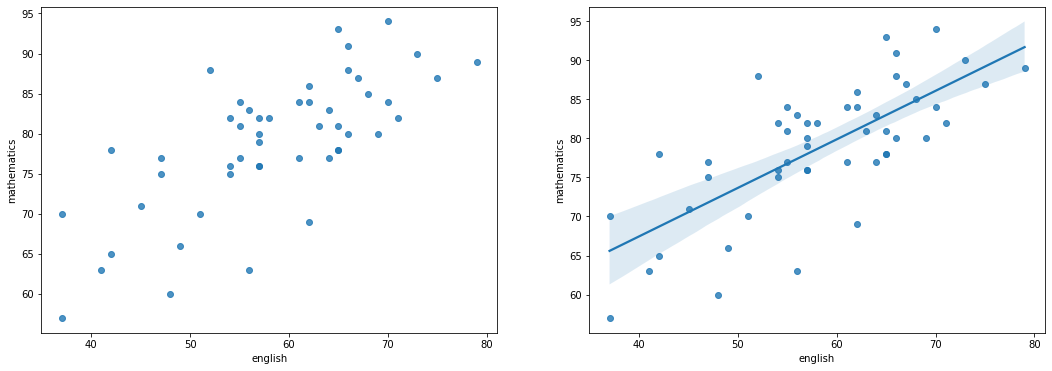

In [120]:
# seaborn에 regplot으로해서 그려볼 수 잇다
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(18,6), sharex = True)
sns.regplot(ax=axes[0], x=df.english, y =df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y =df.mathematics)
plt.show()

In [ ]:
# english와 mathematics 두변수의 상관관계를 히트맵으로 표현하세요.

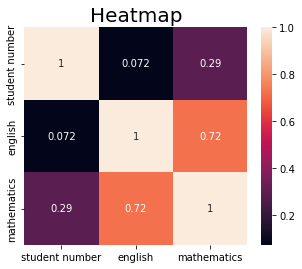

In [122]:
# 변수간의 관계를 색의 농도에 따라 볼 수 있음
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap',fontsize=20)
plt.show()
plt.close()

In [123]:
df.mathematics.mean()

78.88

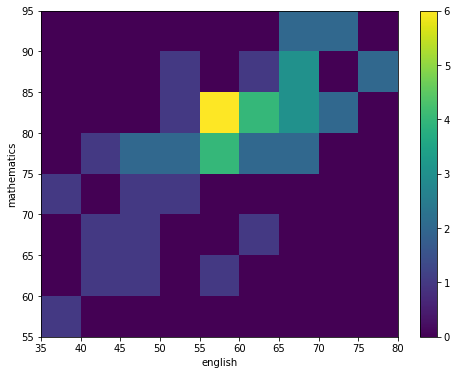

In [165]:
# hist2d 메소드로 히트맵 작성
# 좀 더 구체적으로 변수 안에 계급을 나눠 계급간의 관계를 볼 수 있는 hist2d
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores, math_scores, bins=[9,8], range=[(35,80),(55,95)]) # 한꺼번에 eng, math 범위 계급값 저장

#print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1]) # 위에서 저장한 c[1]은 xticks로
ax.set_yticks(c[2]) # c[2]는 yticks로 

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [166]:
import numpy as np
arr = np.random.randint(0,10,size=(7,3))
np.random.seed(0)
print(arr)
arr1 = arr[:,0] # 1열 출력
arr2 = arr[:,1] # 2열 출력
arr2

[[5 0 3]
 [3 7 9]
 [3 5 2]
 [4 7 6]
 [8 8 1]
 [6 7 7]
 [8 1 5]]


array([0, 7, 5, 7, 8, 7, 1])

In [130]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0] # 3차원 data를 가지고 anscombe_data 각종 통계값

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [164]:
stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data): # key, value값 형태
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}', # 평균
                              f'{np.var(dataX):.2f}', # 분산
                              f'{np.mean(dataY):.2f}', #평균
                              f'{np.var(dataY):.2f}', # 분산
                              f'{np.corrcoef(dataX,dataY)[0,1]:.2f}', # 상관계수 corrcoef
                              f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'] # 회귀식 poly_fit
stats_df # point -> 네개의 데이터의 상관계수가 똑같다 > 상관계수를 가지고서 두 변수의 움직임이 비슷하겟거니 추측가능

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


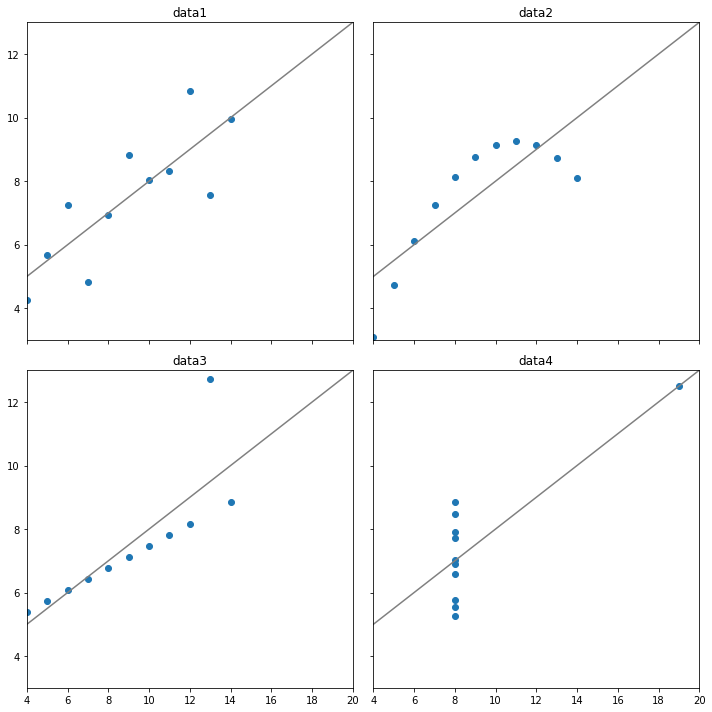

In [167]:
ig,axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10),
                       sharex=True, sharey=True)
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
plt.tight_layout()
plt.show() # 실제 시각화 해보면 비슷하지않음 -> 탐색적 분석을 할때 통계적인 숫자에만 의존하면 안되고 
# 시각화를 같이 병행해서 봐야 좀 더 데이터를  정확하게 탐색 할 수 잇음

In [168]:
import pandas as pd
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [173]:
# Q. species 그룹별 통계량을 구하세요
fdf.groupby('species').describe() 

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### groupby()
- groupby 메서드는 데이터를 그룹 별로 분류하는 역할을 한다. groupby 메서드의 인수로는 다음과 같은 값을 사용한다.
    - 열 또는 열의 리스트
    - 행 인덱스
- 연산 결과로 그룹 데이터를 나타내는 GroupBy 클래스 객체를 반환한다. 이 객체에는 그룹별로 연산을 할 수 있는 그룹연산 메서드가 있다.

### 그룹연산 메서드 (자주 사용되는 그룹연산 메서드)
- size, count: 그룹 데이터의 갯수
- mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
- sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
- first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터
- agg, aggregate
    - 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달한다.
    - 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.
- describe
    - 하나의 그룹 대표값이 아니라 여러개의 값을 데이터프레임으로 구한다.
- apply
    - describe 처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹연산이 없는 경우에 사용한다.
- transform
    - 그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형한다.

### pivot_table
- Pandas는 pivot 명령과 groupby 명령의 중간 성격을 가지는 pivot_table 명령도 제공한다.
- pivot_table 명령은 groupby 명령처럼 그룹분석을 하지만 최종적으로는 pivot 명령처럼 피봇테이블을 만든다. 즉 groupby 명령의 결과에 unstack을 자동 적용하여 2차원적인 형태로 변형한다. 
- pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')
    - data: 분석할 데이터프레임 (메서드일 때는 필요하지 않음)
    - values: 분석할 데이터프레임에서 분석할 열
    - index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트
    - aggfunc: 분석 메서드
    - fill_value: NaN 대체 값
    - margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부
    - margins_name: 마진 열(행)의 이름

In [177]:
import pandas as pd
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf # 특정 목적이 있을때 각 스토어별 컬러별 판매량 보고싶다면 ? -> 피벗테이블 이용하여 뽑아낼수 잇음

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [174]:
# Q. 각 store의 컬러별 판매량을 파악할 수 있는 피봇 테이블을 작성하세요. 
pivot = pd.pivot_table(sdf, index='store',columns='color', values='sales',aggfunc='sum')
pivot

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [175]:
 # 행 index에 store, color  
# 분석할 열 sales
# 집계 함수 sum
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum') 

sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [49]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [50]:
# Q. x, y의 공분산을 구하세요.
# 공분산을 구하는 방법 -> 표본분산, 불편분산
# 기본적으로 불편분산을 사용해야함
x_dev = cdf.x - cdf.x.mean() # x 본래의 데이터 - x의 평균값 -> 편차
y_dev = cdf.y - cdf.y.mean() # y의 편차
cov = sum(x_dev * y_dev)/(len(cdf)-1) # 편차 곱한것을 불편분산은 n-1로 나눠야함
print(round(cov,2),'\n')
np.cov(x_dev,y_dev,ddof=1) # 행렬 형태로도 구하기 가능 , ddof=1 불편분산

7.67 



array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [51]:
# Q. 상관행렬을 구하세요
display(cdf.cov().iloc[0,1].round(2), cdf.corr().round(2))
np.corrcoef(x_dev,y_dev)  # corrcoef함수 통해서 상관행렬을 구할 수 있음
# 여기까지가 기술통계에 대해 구하였음

7.67

,x,y
x,1.00,0.76
y,0.76,1.00


array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])